In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\91998\Desktop\data\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:

df['date_added'].isna().value_counts()


date_added
False    8797
True       10
Name: count, dtype: int64

In [5]:
df.dropna(subset='date_added',inplace=True)

df['date_added'].isna().value_counts()

date_added
False    8797
Name: count, dtype: int64

In [6]:

df['date_added']=df['date_added'].apply(lambda x:x.strip())

df['Date_Added'] = pd.to_datetime(df['date_added']).dt.strftime('%d-%m-%Y')

df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25-09-2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24-09-2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24-09-2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24-09-2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24-09-2021


In [7]:
df['year_added']=pd.to_datetime(df['Date_Added'],dayfirst=True).dt.year
df['month_added']=pd.to_datetime(df['Date_Added'],dayfirst=True).dt.month
df['day_added']=pd.to_datetime(df['Date_Added'],dayfirst=True).dt.day
df.drop('Date_Added',axis=1,inplace=True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24


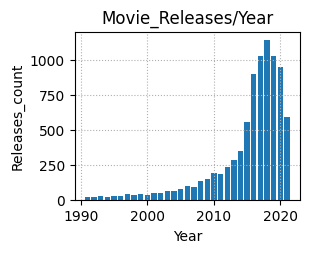

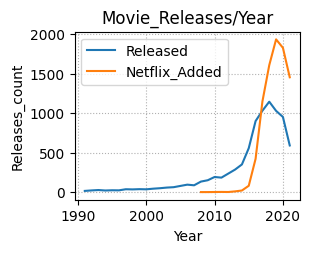

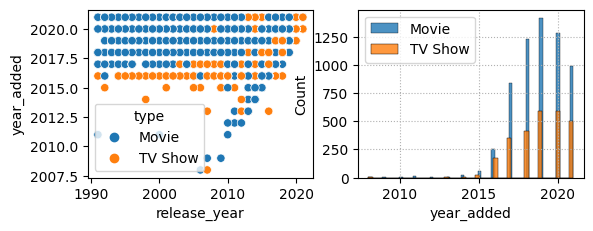

In [84]:
plt.subplot(2,2,1)
df1=df[df['release_year']>1990]
df1=df1['release_year'].value_counts().reset_index()
plt.grid(linestyle='dotted')
plt.bar(df1['release_year'],df1['count'])
plt.title('Movie_Releases/Year')
plt.xlabel('Year')
plt.ylabel('Releases_count')
plt.show()

plt.subplot(2,2,2)
dfa=df[df['release_year']>1990]

df1=dfa['release_year'].value_counts().reset_index()
sns.lineplot(x='release_year',y='count',data=df1,label='Released')

df2=dfa['year_added'].value_counts().reset_index()
sns.lineplot(x='year_added',y='count',data=df2,label='Netflix_Added')

plt.grid(linestyle='dotted')
plt.title('Movie_Releases/Year')
plt.xlabel('Year')
plt.ylabel('Releases_count')
plt.show()

plt.subplot(2,2,3)
sns.scatterplot(x=df[df['release_year']>1990]['release_year'],y=df[df['year_added']>1990]['year_added'],hue=df['type'])
plt.plot()

plt.subplot(2,2,4)
for category in df['type'].unique():
    sns.histplot(data=df[df['type'] == category], x='year_added', label=category, alpha=0.8)
plt.legend()
plt.grid(linestyle='dotted')

plt.show()



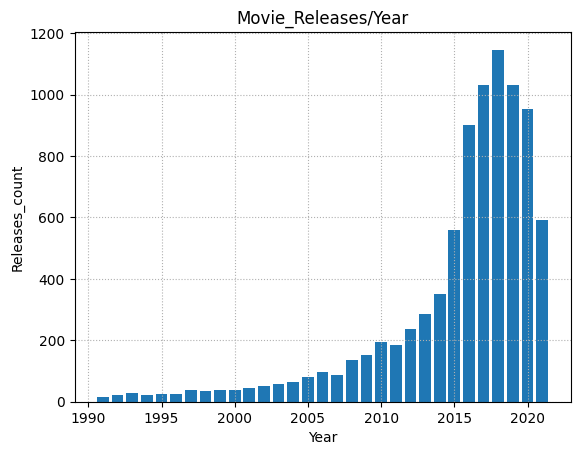

In [8]:
df1=df[df['release_year']>1990]
df1=df1['release_year'].value_counts().reset_index()
plt.grid(linestyle='dotted')
plt.bar(df1['release_year'],df1['count'])
plt.title('Movie_Releases/Year')
plt.xlabel('Year')
plt.ylabel('Releases_count')
plt.show()






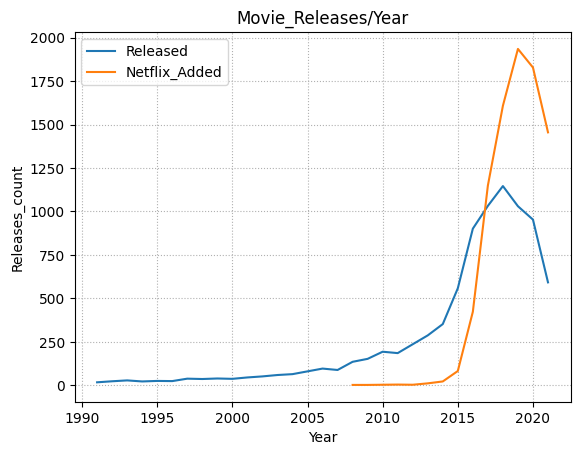

In [74]:
dfa=df[df['release_year']>1990]

df1=dfa['release_year'].value_counts().reset_index()
sns.lineplot(x='release_year',y='count',data=df1,label='Released')

df2=dfa['year_added'].value_counts().reset_index()
sns.lineplot(x='year_added',y='count',data=df2,label='Netflix_Added')

plt.grid(linestyle='dotted')
plt.title('Movie_Releases/Year')
plt.xlabel('Year')
plt.ylabel('Releases_count')
plt.show()



[]

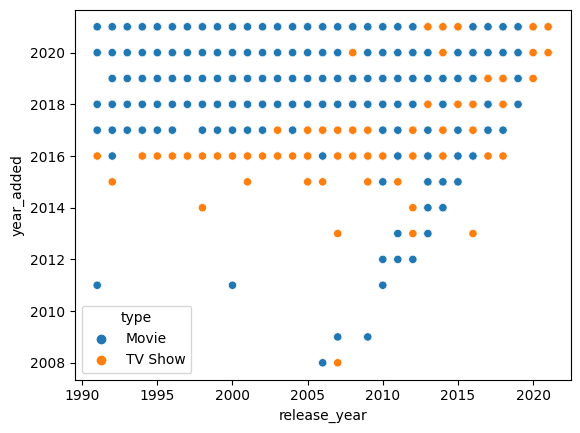

In [10]:
sns.scatterplot(x=df[df['release_year']>1990]['release_year'],y=df[df['year_added']>1990]['year_added'],hue=df['type'])
plt.plot()

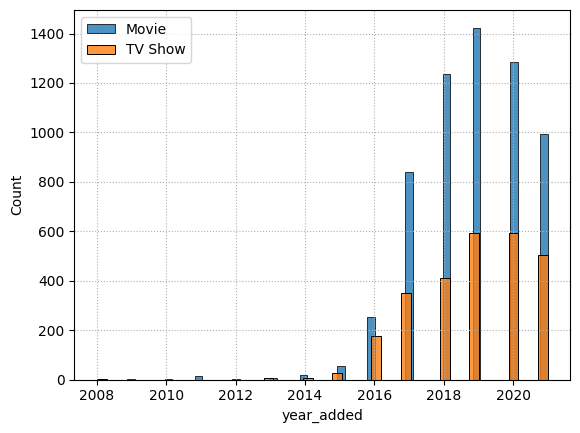

In [11]:
for category in df['type'].unique():
    sns.histplot(data=df[df['type'] == category], x='year_added', label=category, alpha=0.8)
plt.legend()
plt.grid(linestyle='dotted')

plt.show()

# #Movie launch Time Analysis.

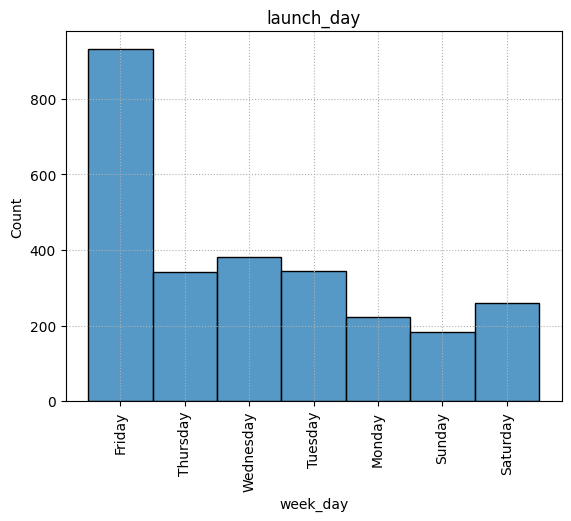

In [12]:
df.head()
df['week_day']=pd.to_datetime(df['date_added']).dt.day_name()
df1=df[df['type']=='TV Show']
sns.histplot(df1['week_day'],)
plt.xticks(rotation=90)
plt.title('launch_day')
plt.grid(linestyle='dotted')
plt.show()

In [13]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,Friday


# #Analysis of Actor's & Directors.

#TV show Cast & Director analysis.

In [14]:
a=df[df['type']=='TV Show']['cast'].str.split(',',expand=True)
df_stacked = a.stack().to_frame().T
df_stacked.T.value_counts()

 Takahiro Sakurai     24
 Ai Kayano            17
 Junichi Suwabe       17
 Yuki Kaji            17
David Attenborough    14
                      ..
 Johan Ulveson         1
 Johan van Assche      1
 Johanna Braddy        1
 Johanna Francella     1
Şükrü Özyıldız         1
Name: count, Length: 15450, dtype: int64

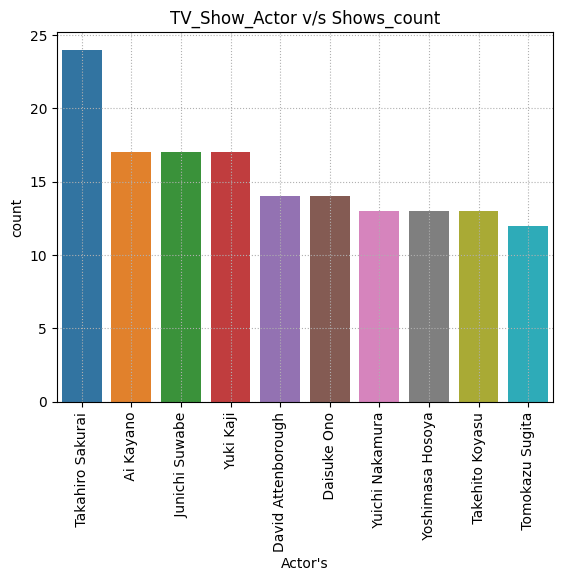

In [15]:


a=df_stacked.T.value_counts().head(10).reset_index()
sns.barplot(x=a.iloc[:,0],y=a.iloc[:,1])
plt.grid(linestyle='dotted')
plt.xticks(rotation=90)
plt.title('TV_Show_Actor v/s Shows_count')
plt.xlabel('Actor\'s')

plt.show()

In [16]:
a=df[df['type']=='TV Show']['director'].str.split(',',expand=True)
df_stacked = a.stack().to_frame().T
df_stacked.T.value_counts()

Alastair Fothergill       3
Ken Burns                 3
Jung-ah Im                2
Shin Won-ho               2
 Gautham Vasudev Menon    2
                         ..
Billy Corben              1
Bhavik Thakore            1
Bejoy Nambiar             1
BB Sasore                 1
Ziad Doueiri              1
Name: count, Length: 300, dtype: int64

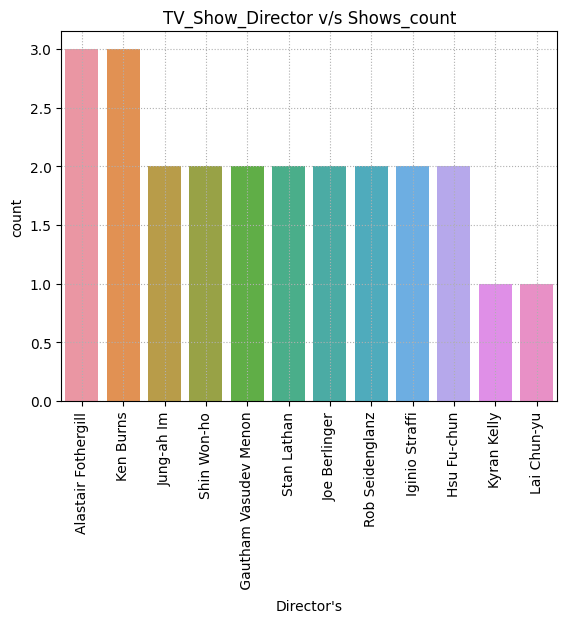

In [17]:


a=df_stacked.T.value_counts().head(12).reset_index()
sns.barplot(x=a.iloc[:,0],y=a.iloc[:,1])
plt.grid(linestyle='dotted')
plt.xticks(rotation=90)
plt.title('TV_Show_Director v/s Shows_count')
plt.xlabel('Director\'s')
plt.show()

#Movie Cast & Director Analysis

In [18]:
a=df[df['type']=='Movie']['cast'].str.split(',',expand=True)
df_stacked = a.stack().to_frame().T
df_stacked.T.value_counts()

 Anupam Kher          38
 Om Puri              27
 Rupa Bhimani         27
Shah Rukh Khan        26
 Paresh Rawal         25
                      ..
 Jonatan Rodriguez     1
 Jonas Leite           1
 Jonas Bloquet         1
 Jonah Mussolino       1
Ṣọpẹ́ Dìrísù           1
Name: count, Length: 27879, dtype: int64

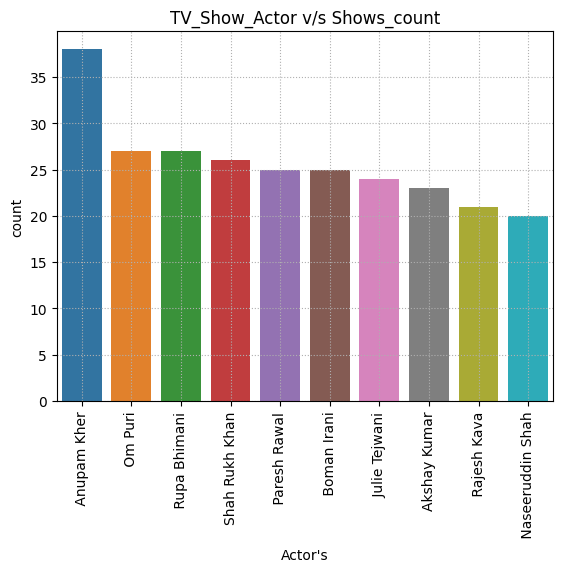

In [19]:
a=df_stacked.T.value_counts().head(10).reset_index()
sns.barplot(x=a.iloc[:,0],y=a.iloc[:,1])
plt.grid(linestyle='dotted')
plt.xticks(rotation=90)
plt.title('TV_Show_Actor v/s Shows_count')
plt.xlabel('Actor\'s')
plt.show()

In [20]:
a=df[df['type']=='Movie']['director'].str.split(',',expand=True)
df_stacked = a.stack().to_frame().T
df_stacked.T.value_counts()

Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Suhas Kadav           16
Marcus Raboy          15
                      ..
Jamal Hill             1
Jameel Buari           1
James Barr             1
 Syed Ahmed Shawki     1
Joel Schumacher        1
Name: count, Length: 4886, dtype: int64

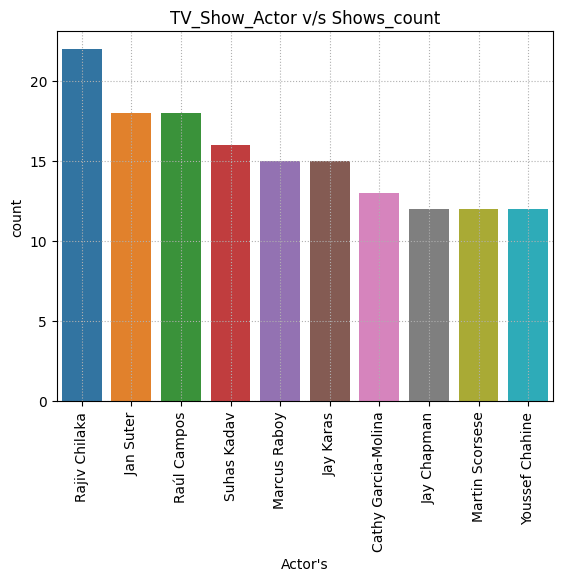

In [21]:
a=df_stacked.T.value_counts().head(10).reset_index()
sns.barplot(x=a.iloc[:,0],y=a.iloc[:,1])
plt.grid(linestyle='dotted')
plt.xticks(rotation=90)
plt.title('TV_Show_Actor v/s Shows_count')
plt.xlabel('Actor\'s')
plt.show()

In [22]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,Friday


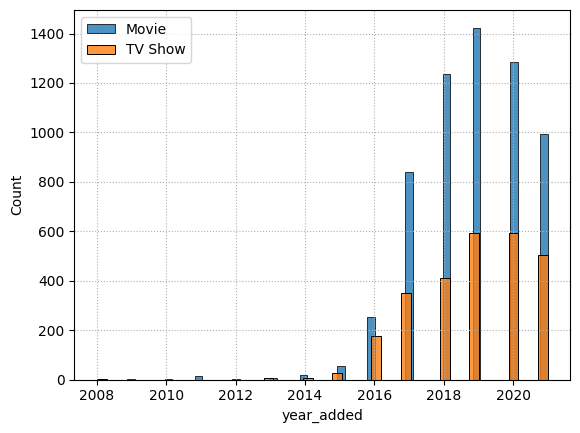

In [23]:
for category in df['type'].unique():
    sns.histplot(data=df[df['type'] == category], x='year_added', label=category, alpha=0.8)
plt.legend()
plt.grid(linestyle='dotted')

plt.show()

In [86]:
df.head(1)
dfa=df[df['type']=='Movie'].groupby('year_added')['year_added'].value_counts().reset_index()
dfa = dfa.rename(columns={'count': 'Movie'})


dfb=df[df['type']=='TV Show'].groupby('year_added')['year_added'].value_counts().reset_index()
dfb = dfb.rename(columns={'count': 'TV show'})

merged_df = pd.merge(dfa, dfb, on='year_added', how='inner')
merged_df['TV_show_%_age']=(merged_df['TV show']*100/(merged_df['Movie']+merged_df['TV show'])).round(1)

#sns.lineplot(x=merged_df['year_added'],y=merged_df['TV_show_%_age'])
sns.lineplot(x=merged_df['year_added'],y=merged_df['Movie'],label='Movie')
sns.lineplot(x=merged_df['year_added'],y=merged_df['TV show'],label='TV show')
plt.grid(linestyle='dotted')
plt.ylabel('count')
plt.legend()
plt.show()


,year_added,count
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,839


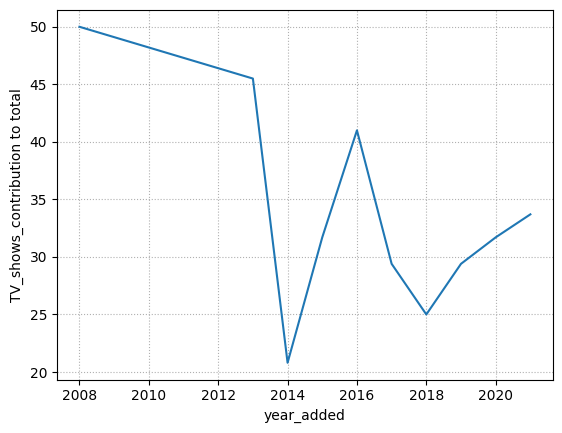

In [73]:
sns.lineplot(x=merged_df['year_added'],y=merged_df['TV_show_%_age'])
plt.grid(linestyle='dotted')
plt.ylabel('TV_shows_contribution_to_total')
plt.show()